In [18]:
import math

import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [19]:
### Configuration
dataFile = '../Data/OnshorePVT.csv'

# Data columns
colsInputs = ['OilGravityAPI', 'GasGravity', 'SolutionGasOilRatio', 'ReservoirTemperature', 'InitialReservoirPressure']
colsOutputs = ['Coi']
colsDrop = ['Bob', 'Boi', 'Bgi', 'Bwi', 'Cgi', 'Cwi', 'Cti', 'Coi(Vazquez-Beggs)']

# Split train and test data
testsize = 0.25
cv = 5

    WellName  OilGravityAPI  GasGravity  SolutionGasOilRatio  \
0         A1      43.900000    0.800000          1890.290000   
1         A2      41.805573    0.816515          1566.478271   
2         A3      41.805573    0.816515          3665.300537   
3         A4      41.805573    0.816515          1475.636963   
4         A5      45.000000    0.800000          3610.910841   
..       ...            ...         ...                  ...   
924     A925      46.645455    0.722000          3506.099049   
925     A926      45.523960    0.799321          2113.674072   
926     A927      49.700000    0.780000          4443.235284   
927     A928      45.000000    0.800000          3415.381033   
928     A929      44.018182    0.719636          3188.693391   

     InitialReservoirPressure  ReservoirTemperature       Coi  
0                 8726.530000            175.000000  0.000012  
1                 8907.097656            181.420624  0.000010  
2                 8826.688477          

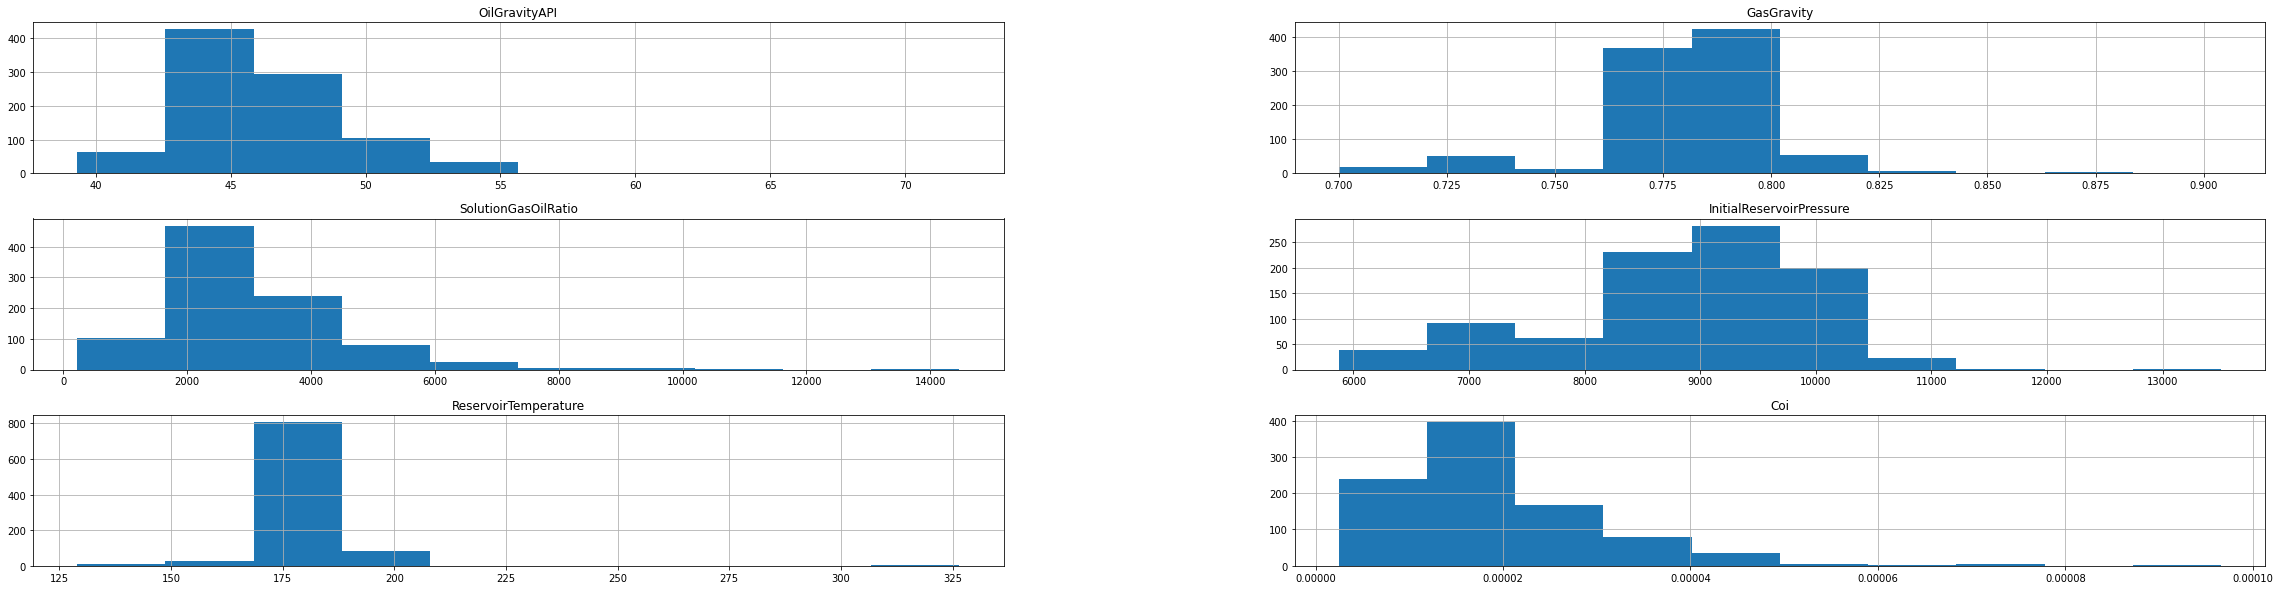

In [20]:
### Data Loading (raw data)
df = pd.read_csv(dataFile)
df = df.drop(columns=colsDrop,axis='columns')

print(df)

# Histogram
df.hist(figsize=(40,10));

In [21]:
### Data Pre-processing

rawinputs = df[colsInputs]
rawoutputs = df[colsOutputs]

# Scale the data
sc = MinMaxScaler()
inputs = pd.DataFrame(sc.fit_transform(rawinputs))
outputs = pd.DataFrame(sc.fit_transform(rawoutputs))

inputs.columns = rawinputs.columns
outputs.columns = rawoutputs.columns

nInputs = len(inputs.columns)
nOutputs = len(outputs.columns)

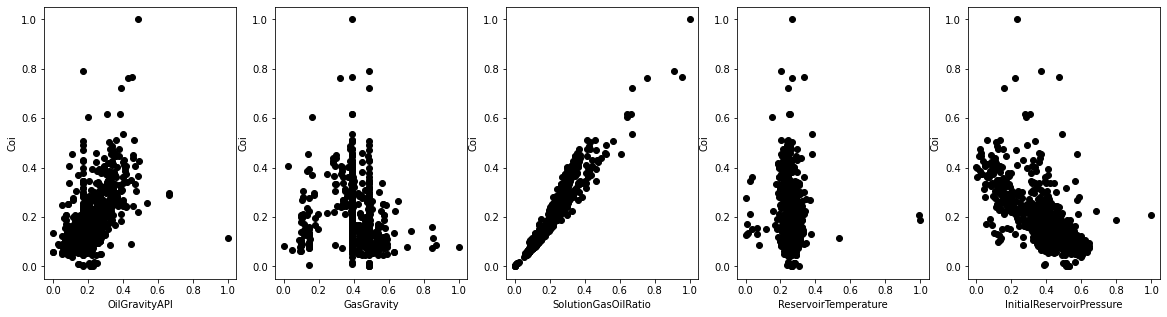

In [22]:
### Exploratory Data Analysis

# Plot inputs vs outputs
fig,ax = plt.subplots(nrows=nOutputs,ncols=nInputs,figsize=(20,5));
ax = ax.flatten()

for i in range(nInputs):
    for j in range(nOutputs):
        ax[i].plot(inputs.iloc[:,i],outputs.iloc[:,j],'ko')
        ax[i].set(xlabel=inputs.columns[i])
        ax[i].set(ylabel=outputs.columns[j])

Train Size = 696, Test Size = 233


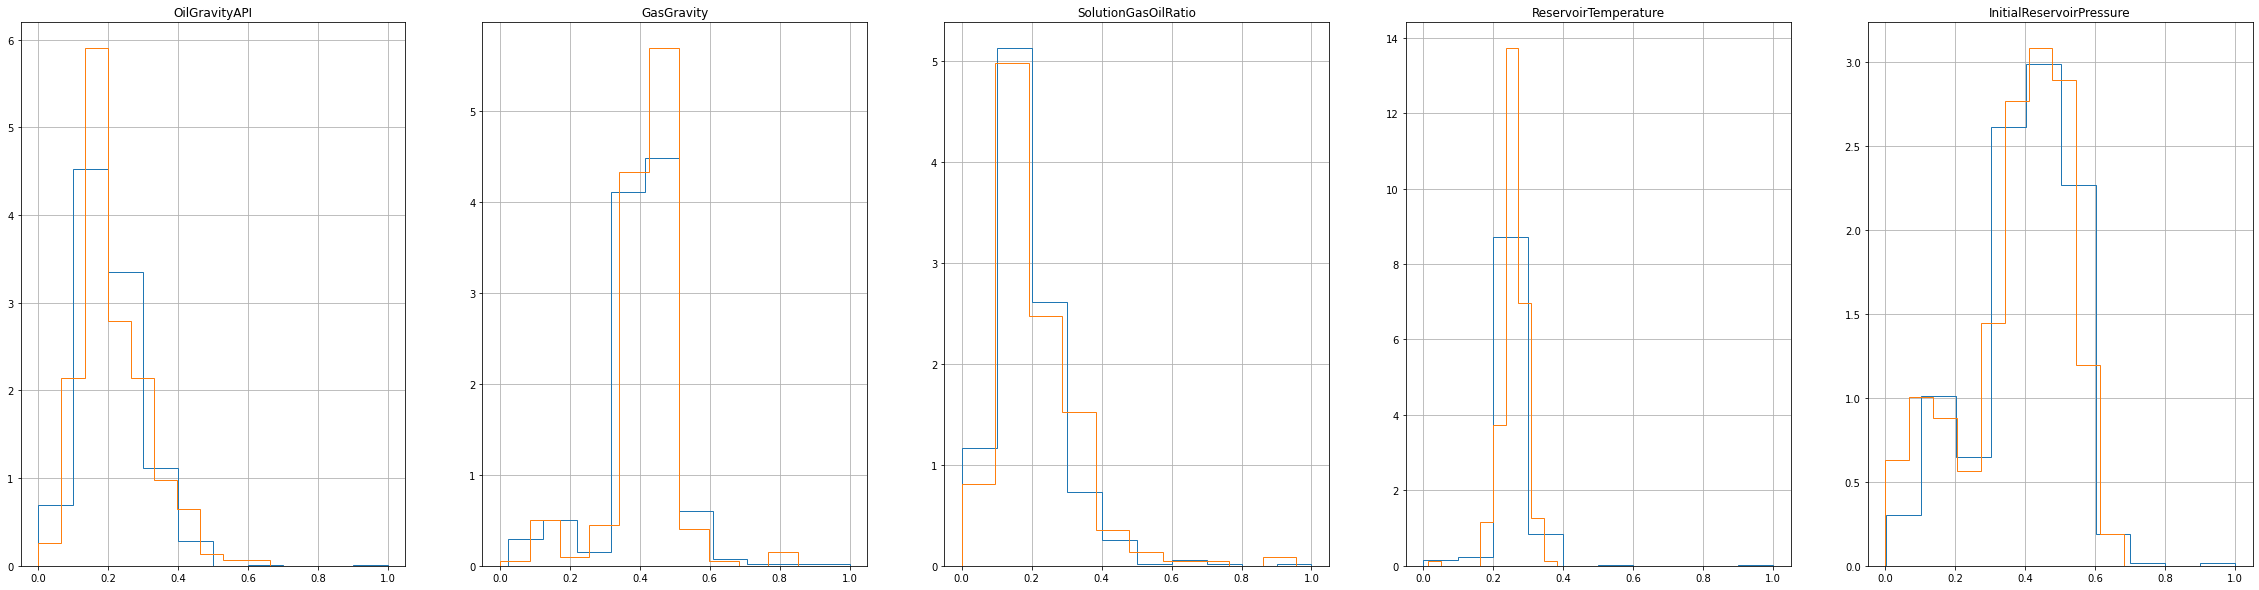

In [23]:
### "Train" and "Test" data split
# Split "Train" and "Test" data
[xtrain,xtest,ytrain,ytest] = train_test_split(inputs, outputs, test_size=testsize, random_state=19)
print("Train Size = " + str(len(xtrain)) + ", Test Size = " + str(len(xtest)))

# Plot train and test data
ncols = 5
nrows = math.ceil(nInputs/ncols)

fig,ax = plt.subplots(nrows=nrows,ncols=ncols);
ax = ax.flatten()

for i in range(nInputs):
    line1 = xtrain.iloc[:,i].hist(figsize=(40,10), ax=ax[i], density=True, histtype='step', fill=False)
    line2 = xtest.iloc[:,i].hist(figsize=(40,10), ax=ax[i], density=True, histtype='step', fill=False)
    ax[i].set(title=xtrain.columns[i])


Coefficients = [ 0.05638944  0.00565805  0.88492439  0.02179219 -0.19475888]
Intercept = 0.06270331441856528
Train: MAE = 0.009804355179734414, RMSE = 0.013262040355432481, MSE = 0.00017588171438911968, R2 = 0.9847511354092774
Test: MAE = 0.011177766744777058, RMSE = 0.01589583822925495, MSE = 0.0002526776730106431, R2 = 0.9846555117369005


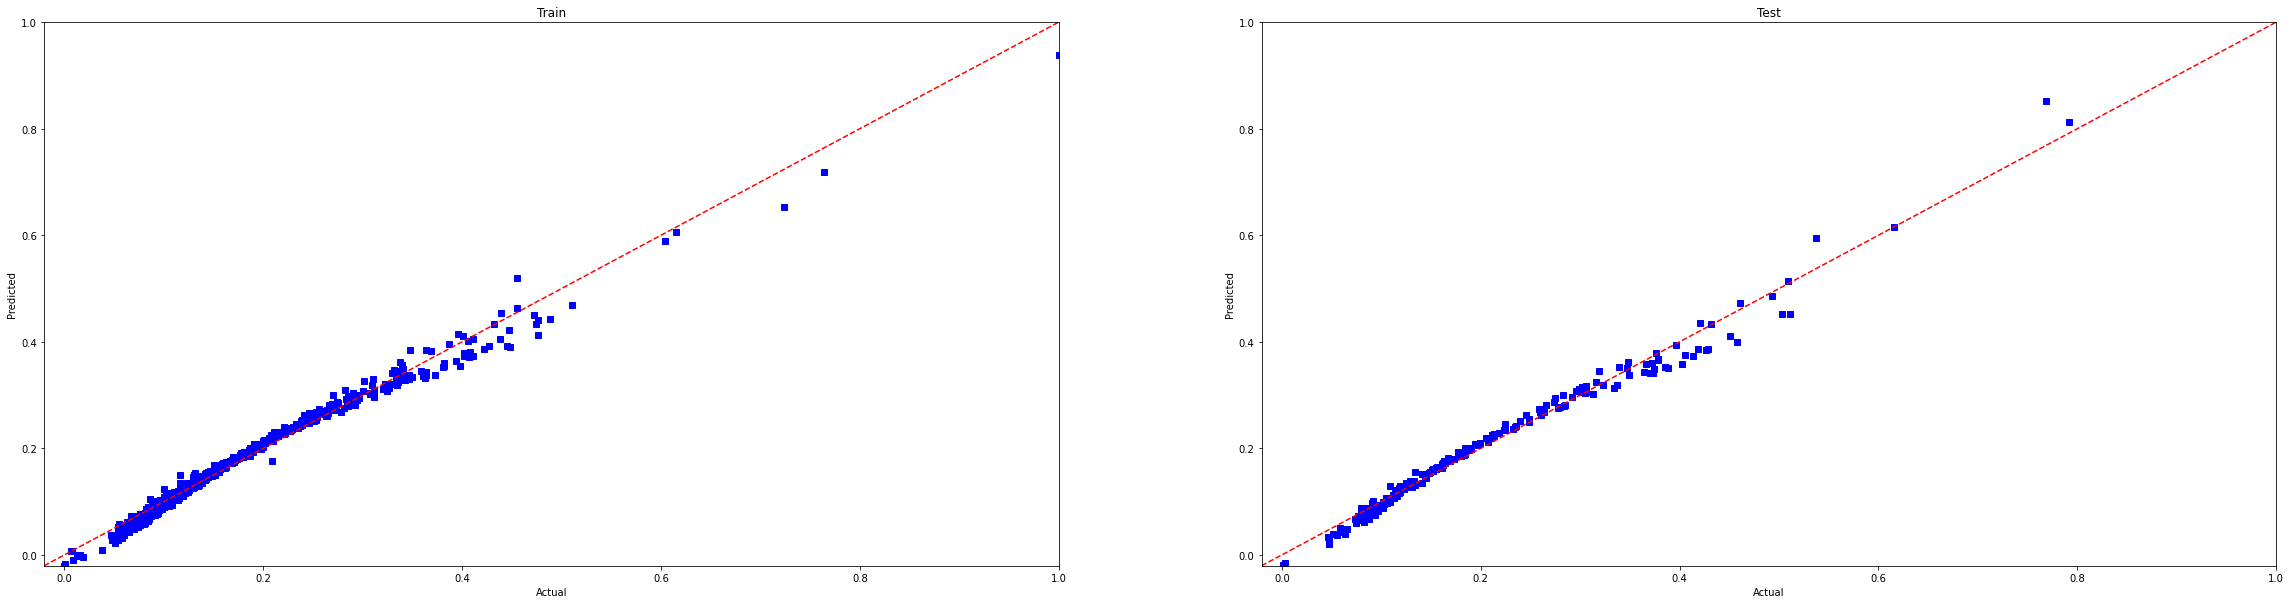

In [24]:
### Model Training

# Model fitting
reg = LinearRegression()
model = reg.fit(xtrain,ytrain.values.ravel())
print("Coefficients = " + str(reg.coef_))
print("Intercept = " + str(reg.intercept_))

# Model prediction
ytrainpred = model.predict(xtrain)
mae_train = metrics.mean_absolute_error(ytrain,ytrainpred)
mse_train = metrics.mean_squared_error(ytrain,ytrainpred)
rmse_train = math.sqrt(mse_train)
r2_train = metrics.r2_score(ytrain,ytrainpred)
print("Train: MAE = " + str(mae_train) + ", RMSE = " + str(rmse_train) + ", MSE = " + str(mse_train) + ", R2 = " + str(r2_train))

ytestpred = model.predict(xtest)
mae_test = metrics.mean_absolute_error(ytest,ytestpred)
mse_test = metrics.mean_squared_error(ytest,ytestpred)
rmse_test = math.sqrt(mse_test)
r2_test = metrics.r2_score(ytest,ytestpred)
print("Test: MAE = " + str(mae_test) + ", RMSE = " + str(rmse_test) + ", MSE = " + str(mse_test) + ", R2 = " + str(r2_test))

# Display results
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(40,10));
ax = ax.flatten()

ll = min(min(ytrainpred),ytrain.min().min(),min(ytestpred),ytest.min().min())
hl = max(max(ytrainpred),ytrain.max().max(),max(ytestpred),ytest.max().max())

ax[0].plot(ytrain,ytrainpred,'bs')
ax[0].plot([ll,hl],[ll,hl],'r--')
ax[0].set(xlabel='Actual')
ax[0].set(ylabel='Predicted')
ax[0].set(title='Train')
ax[0].set_xlim(ll,hl)
ax[0].set_ylim(ll,hl)

ax[1].plot(ytest,ytestpred,'bs')
ax[1].plot([ll,hl],[ll,hl],'r--')
ax[1].set(xlabel='Actual')
ax[1].set(ylabel='Predicted')
ax[1].set(title='Test');
ax[1].set_xlim(ll,hl)
ax[1].set_ylim(ll,hl);
